## Purpose: CombiModel example

Use Case:
Fit a line multiplet in spectral data.

Demonstration: 
    1. CombiModel
    2. Failed Parameter fit, using LevenbergMarquardtFitter
    3. Successfull fit using (Annealing) AmoebaFitter
    4. Autoscaling, Chisq, Standard deviations
    5. Confidence region for the fit

Author: Do Kester


import classes

In [16]:
import numpy as numpy
import math

from GaussModel import GaussModel
from CombiModel import CombiModel
from PolynomialModel import PolynomialModel
from LevenbergMarquardtFitter import LevenbergMarquardtFitter
from AmoebaFitter import AmoebaFitter
from Formatter import formatter as fmt
from Tools import printclass
from FitPlot import plotFit
import matplotlib.pyplot as plt

define some constants

In [23]:
N = 201
x0 = 0.1            # x position of gaussian
a0 = 10.0           # amplitude of gaussian
s0 = 0.1            # width   
b0 = 1.0            # offset of background
b1 = 0.2            # slope of background
   
a1 = 0.7 * a0
a2 = 1.2 * a0
a3 = 0.4 * a0
x1 = x0 + 1.4
x2 = x0 + 2.7   
x3 = x0 + 3.3

sig = 0.2

make a 3-degree polynomial

In [24]:
x = numpy.linspace( -2.0, 5.0, N, dtype=float )
ym = a0 * numpy.exp( -0.5 * numpy.square( (x - x0) / s0 ) )
ym += a1 * numpy.exp( -0.5 * numpy.square( (x - x1) / s0 ) )
ym += a2 * numpy.exp( -0.5 * numpy.square( (x - x2) / s0 ) )
ym += a3 * numpy.exp( -0.5 * numpy.square( (x - x3) / s0 ) )
ym += b0 + b1 * x

numpy.random.seed( 1308 )
y = ym + sig * numpy.random.randn( N )


Define the model as a combination of 4 GaussModels, of which the centers are connected additively:
    * center_0 = param_1
    * center_1 = param_1 + 1.4 
    * center_2 = param_1 + 2.7
    * center_3 = param_1 + 3.3
The widths are connected multiplicatively
    * width_[:] = param_2 * 1
All lines have the same width. Alternatively, the same could be achieved with an additive connection: addCombi={2,[0,0,0,0]}.

In [29]:
gm = GaussModel()
com = CombiModel( gm, 4, addCombi={1:[0,1.4,2.7,3.3]}, mulCombi={2:[1,1,1,1]} )
com.addModel( PolynomialModel( 1 ) )
#printclass( gm )
#printclass( com )

define the fitter: Fitter

In [26]:
fitter = LevenbergMarquardtFitter( x, com )
 
# find the parameters
param = fitter.fit( y )

  

This fit failed. See plot below.

In [27]:
print( "Parameters :", fmt( param, max=None ) )
print( "StDevs     :", fmt( fitter.stdevs, max=None ) )
print( "Chisq      :", fmt( fitter.chisq ) )
print( "Scale      :", fmt( fitter.scale ) )
print( "Evidence   :", fmt( fitter.getEvidence( limits=[-100,100] ) ) )
print( "Covar matrix :" )
print( fmt( fitter.covariance))

Parameters : [    9.789    0.100    0.101    7.133   11.924    3.984    0.991    0.194]
StDevs     : [    0.089    0.001    0.001    0.086    0.091    0.086    0.018    0.007]
Chisq      :     6.503
Scale      :     0.184
Evidence   :  -105.659
Covar matrix :
[[    0.008   -0.000   -0.000    0.001    0.001 ...]
 [   -0.000    0.000    0.000   -0.000    0.000 ...]
 [   -0.000    0.000    0.000   -0.000   -0.000 ...]
 [    0.001   -0.000   -0.000    0.007    0.001 ...]
 [    0.001    0.000   -0.000    0.001    0.008 ...] ...]


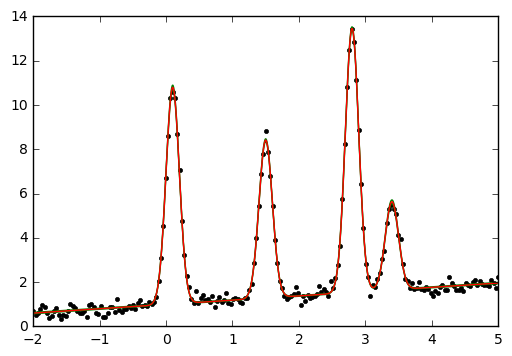

In [28]:
plotFit( x, y, com, ftr=fitter )

Try the AmoebaFitter with a temperature setting to use the annealing feature.

In [30]:
ftr = AmoebaFitter( x, com )
param = ftr.fit( y, temp=2.0, tolerance=0.01 )

In [31]:
print( "Parameters :", fmt( param, max=None ) )
print( "StDevs     :", fmt( fitter.stdevs, max=None ) )
print( "Chisq      :", fmt( fitter.chisq ) )
print( "Scale      :", fmt( fitter.scale ) )
print( "Evidence   :", fmt( fitter.getEvidence( limits=[-100,100] ) ) )
print( "Covar matrix :" )
print( fmt( fitter.covariance))

Parameters : [    9.804    0.100   -0.101    7.137   11.929    3.980    0.988    0.194]
StDevs     : [    0.089    0.001    0.001    0.086    0.091    0.086    0.018    0.007]
Chisq      :     6.503
Scale      :     0.184
Evidence   :  -105.659
Covar matrix :
[[    0.008   -0.000   -0.000    0.001    0.001 ...]
 [   -0.000    0.000    0.000   -0.000    0.000 ...]
 [   -0.000    0.000    0.000   -0.000   -0.000 ...]
 [    0.001   -0.000   -0.000    0.007    0.001 ...]
 [    0.001    0.000   -0.000    0.001    0.008 ...] ...]


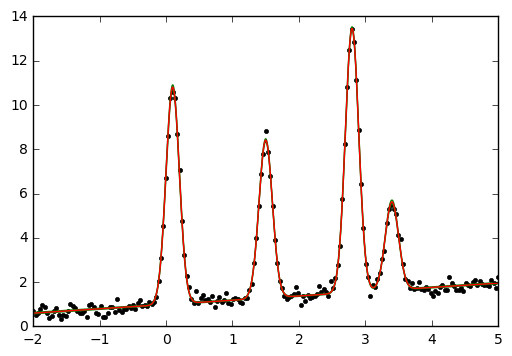

In [32]:
plotFit( x, y, com, ftr=ftr )